# E4 - Seaborn

### What are the most popular stations in the city? 
### Daily Bike Rides vs Average Daily Temperature
### Hourly ride distribution by bike type
### What are the busiest months and is there a weather component at play?
### What are the most popular trips between stations? 
### The distribution of ride durations for classic and electric bikes.
### Hourly ride patterns between members and casual users. 

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import os
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_pickle(r'../02 Data/df_merged_2.0.pkl')

In [3]:
df.drop(columns = ['_merge'], inplace=True)

In [4]:
float_cols = ['avgTemp', 'temp_max', 'temp_min', 'total_precipitation', 'wind_speed']
df[float_cols] = df[float_cols].astype('float32')

# Data exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29806700 entries, 0 to 29806699
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        category      
 2   started_at           datetime64[ns]
 3   ended_at             datetime64[ns]
 4   start_station_name   category      
 5   start_station_id     category      
 6   end_station_name     category      
 7   end_station_id       category      
 8   start_lat            float32       
 9   start_lng            float32       
 10  end_lat              float32       
 11  end_lng              float32       
 12  member_casual        category      
 13  month                object        
 14  date                 datetime64[ns]
 15  avgTemp              float32       
 16  temp_max             float32       
 17  temp_min             float32       
 18  total_precipitation  float32       
 19  wind_speed         

In [6]:
# Monday=0, Sunday=6
df['weekday'] = df['date'].dt.dayofweek

In [7]:
df['day_type'] = df['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [8]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,date,avgTemp,temp_max,temp_min,total_precipitation,wind_speed,weekday,day_type
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663658,-73.963013,40.668133,-73.973640,casual,August,2022-08-27,27.799999,31.100000,23.900000,0.0,3.0,5,Weekend
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717796,-73.993164,40.729538,-73.984268,casual,August,2022-08-20,27.900000,32.799999,24.400000,0.0,3.2,5,Weekend
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735355,-74.004829,40.721699,-74.002380,member,August,2022-08-31,25.600000,29.400000,22.200001,0.0,5.3,2,Weekday
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.10,40.744221,-73.971214,40.764397,-73.973717,member,August,2022-08-02,26.400000,33.900002,21.700001,0.0,3.6,1,Weekday
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982117,40.730312,-73.980469,member,August,2022-08-25,28.100000,32.799999,23.900000,0.0,3.3,3,Weekday


In [9]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name        47
start_station_id          47
end_station_name       69790
end_station_id         69790
start_lat                  0
start_lng                  0
end_lat                37221
end_lng                37221
member_casual              0
month                      0
date                       0
avgTemp                    0
temp_max                   0
temp_min                   0
total_precipitation        0
wind_speed                 0
weekday                    0
day_type                   0
dtype: int64

In [10]:
# Clean both start and end station names from hidden or unwanted characters
for col in ['start_station_name', 'end_station_name']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("'", '', regex=False)          # remove single quotation marks
        .str.replace(r'[\n\t\r]+', ' ', regex=True)  # remove line breaks, tabs, and carriage returns
        .str.replace(r'\s+', ' ', regex=True)        # replace multiple spaces with a single one
        .str.strip()                                 # remove leading and trailing spaces
    )

## Set global theme for all seaborn plots

In [42]:
sns.set_style("ticks")
palette = sns.color_palette("crest_r", n_colors=30)
sns.set_palette(palette)

# What are the most popular stations in the city? 

In [12]:
df['value'] = 1

In [13]:
df_top_start = df.groupby('start_station_name')['value'].count().reset_index()

In [14]:
df_top_start

,start_station_name,value
0,1 Ave & E 110 St,21498
1,1 Ave & E 16 St,67288
2,1 Ave & E 18 St,70760
3,1 Ave & E 30 St,45378
4,1 Ave & E 39 St,52321
...,...,...
1752,Wyckoff St & 3 Ave,248
1753,Wyckoff St & Nevins St,11527
1754,Wythe Ave & Metropolitan Ave,66414
1755,Yankee Ferry Terminal,12911


In [15]:
top20 = df_top_start.nlargest(20, 'value')

<Axes: xlabel='value', ylabel='start_station_name'>

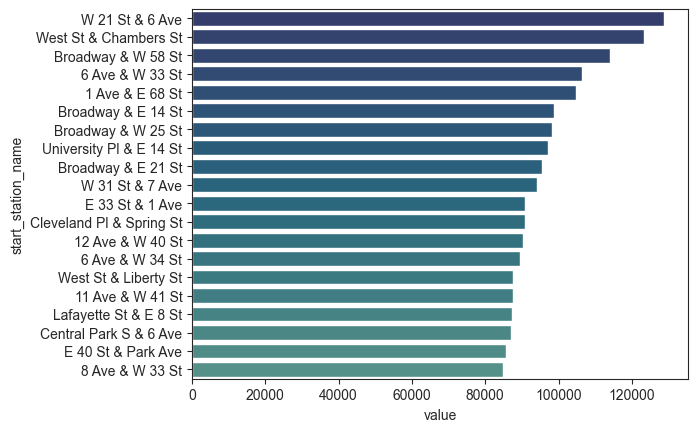

In [16]:
sns.barplot(
    data=top20,
    x='value',
    y='start_station_name'
)

# Daily Bike Rides vs Average Daily Temperature

In [19]:
# 1. Create daily aggregation
df_daily = df.groupby('date').agg({
    'ride_id': 'count',
    'avgTemp': 'mean'
}).reset_index()

# 2. Rename for clarity
df_daily.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

# 3. Set date as index (optional)
df_daily.set_index('date', inplace=True)

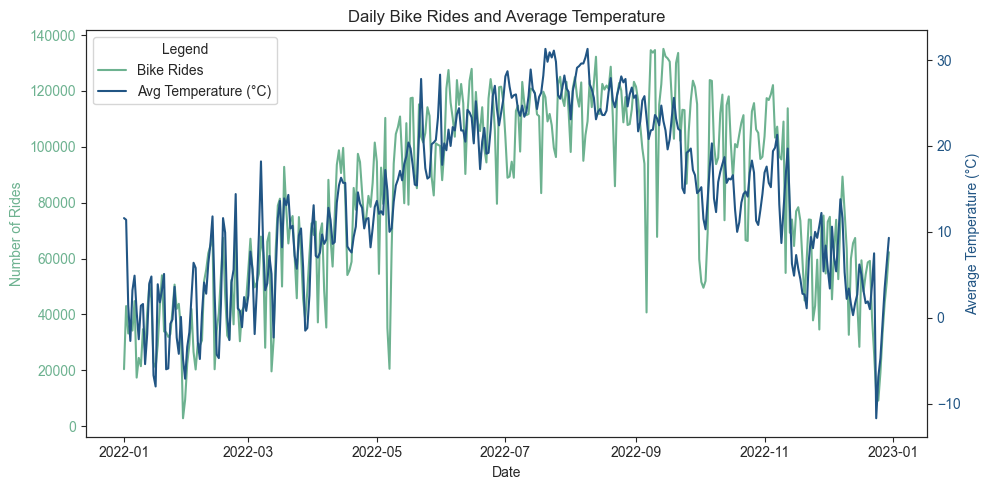

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("crest", n_colors=4)

# --- 1. Bike rides ---
sns.lineplot(
    data=df_daily,
    x=df_daily.index,
    y='bike_rides_daily',
    label='Bike Rides',
    color=palette[0],
    ax=ax
)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rides', color=palette[0])
ax.tick_params(axis='y', labelcolor=palette[0])

# --- 2. Avg temperature ---
ax2 = ax.twinx()
sns.lineplot(
    data=df_daily,
    x=df_daily.index,
    y='avgTemp',
    color=palette[3],
    ax=ax2,
    legend=False
)
ax2.set_ylabel('Average Temperature (°C)', color=palette[3])
ax2.tick_params(axis='y', labelcolor=palette[3])

# Legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_lines(), ['Avg Temperature (°C)']
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.8, title='Legend')

ax.set_title('Daily Bike Rides and Average Temperature')
plt.tight_layout()
plt.show()

# What are the busiest months and is there a weather component at play?

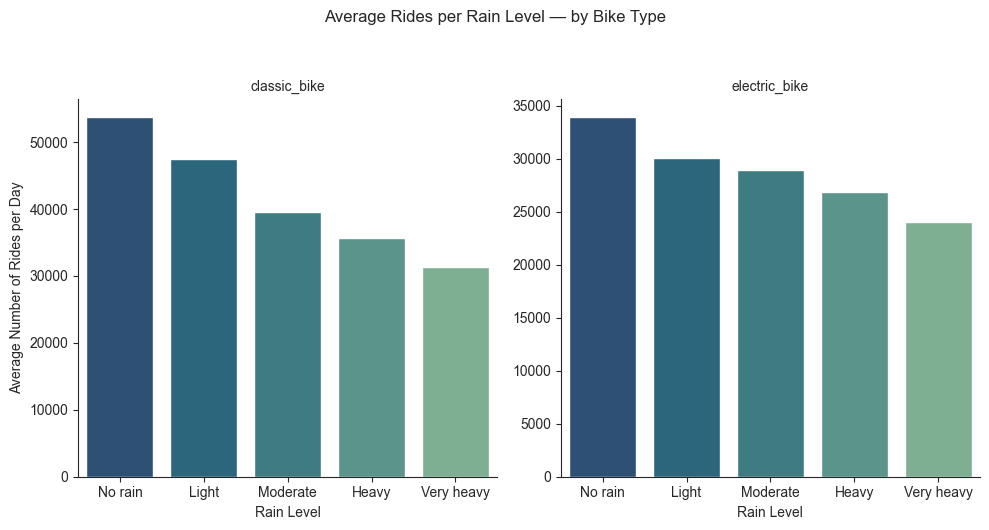

In [21]:
# Define rain level bins
# We'll classify precipitation (mm) into 5 categories:
bins = [0, 1, 5, 10, 20, 50]
labels = ['No rain', 'Light', 'Moderate', 'Heavy', 'Very heavy']

# -----------------------------
# Aggregate daily rides per bike type
# Group by rideable type and date, count total rides per day
# and take the average precipitation for that day.
daily_rides = (
    df.groupby(['rideable_type', 'date'])
      .agg({'value': 'sum', 'total_precipitation': 'mean'})
      .reset_index()
)

# Assign each day to a rain level category
daily_rides['rain_level'] = pd.cut(
    daily_rides['total_precipitation'],
    bins=bins, labels=labels, right=False
)

# Calculate average rides per rain level
rain_stats = (
    daily_rides.groupby(['rideable_type', 'rain_level'])['value']
    .mean()
    .reset_index()
)


# Visualization
g = sns.catplot(
    data=rain_stats,
    x='rain_level', y='value',
    col='rideable_type',
    kind='bar',
    col_wrap=2,     
    sharey=False,    # independent y-axis for each bike type
    palette = 'crest_r'
)

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Rain Level", "Average Number of Rides per Day")
plt.suptitle("Average Rides per Rain Level — by Bike Type", y=1.05)
plt.tight_layout()
plt.show()

Seasonal sensitivity: Classic bikes show much stronger seasonal variation, suggesting users are more weather-dependent when choosing traditional bikes versus electric bikes

Peak ridership: Classic bikes reach nearly twice the daily rides of electric bikes during summer peaks (90,000 vs 50,000)
Winter baseline: Both bike types maintain similar winter baseline ridership (20,000-35,000 rides), but electric bikes show less dramatic seasonal swings

Weather resilience: Electric bikes appear to maintain more consistent ridership year-round, possibly because electric assistance makes riding more comfortable in various conditions

Precipitation impact: Both plots show that major precipitation events (tall green spikes) often coincide with dips in ridership, though the effect is more visible in the classic bike data

In [22]:
# Identify the busiest month by ride count
busiest_month = df['month'].value_counts().sort_values(ascending=False)

In [23]:
busiest_month

August       3576182
September    3411909
July         3397722
June         3344145
October      2935959
May          2865301
November     2386350
April        2261339
March        1846035
December     1560344
February     1197359
January      1024055
Name: month, dtype: int64

The data shows that August was the busiest month in 2022, with over 3.5 million rides, followed closely by September, July, and June. This strong summer peak indicates that ridership increases significantly during warmer months, suggesting that weather plays a key role in cycling activity. Starting from October, the number of rides steadily declines, reaching its lowest point in January with just over 1 million rides. This seasonal trend reflects a clear shift from leisure and tourism-driven trips in summer to reduced mobility in colder winter months. Overall, the pattern demonstrates a strong correlation between temperature and cycling demand throughout the year.

# Hourly ride distribution by bike type

In [24]:
# Create a new column with the ride start hour
df['hour'] = df['started_at'].dt.hour

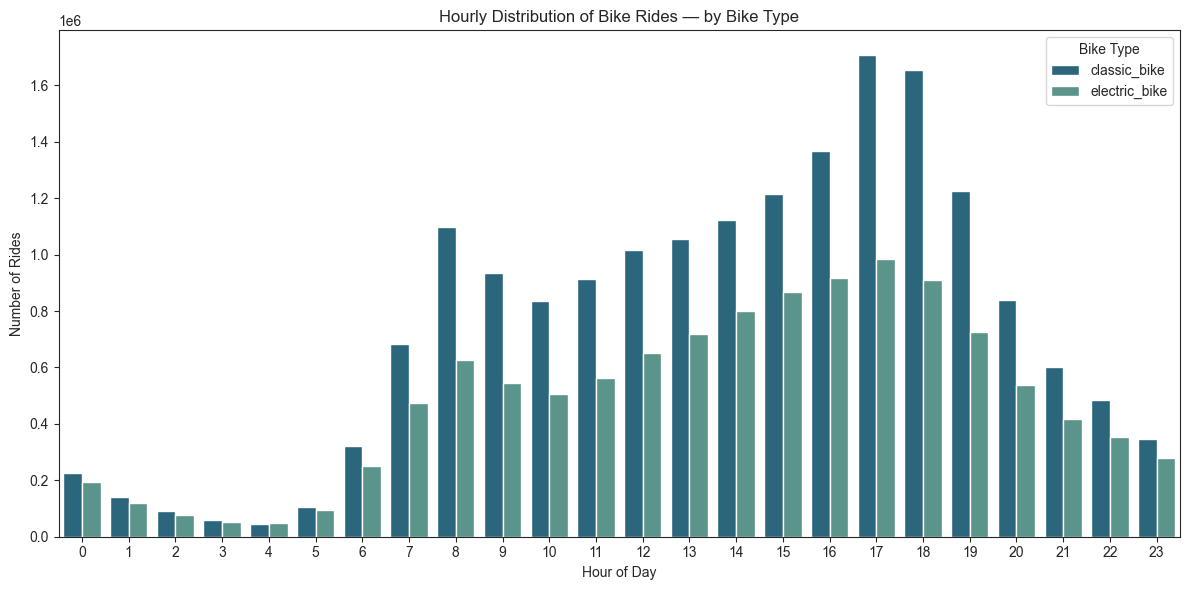

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='hour',
    hue='rideable_type',
    palette = 'crest_r'
)

plt.title('Hourly Distribution of Bike Rides — by Bike Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend(title='Bike Type')
plt.tight_layout()
plt.show()

In [26]:
# When are rides most frequent?
df.groupby('hour')['value'].sum().sort_values(ascending=False).head()

hour
17    2693849
18    2564597
16    2284816
15    2082173
19    1954047
Name: value, dtype: int64

Each bar represents the total number of rides started at that hour across the year.

there are two commute peaks:

Morning (around 8 a.m.) — people going to work or school.
Evening (4–7 p.m.) — people returning home.
The evening peak (around 17:00–18:00) is slightly higher than the morning one.

Classic bikes dominate overall usage, but electric bikes maintain steady demand throughout the day — especially in off-peak hours.

In [29]:
df.groupby(['weekday', 'rideable_type'])['ride_id'].count().unstack()

rideable_type,classic_bike,electric_bike
weekday,,
0,2365822,1548993
1,2609465,1719388
2,2801244,1836316
3,2696721,1826381
4,2626542,1824678
5,2669867,1575433
6,2322975,1382875


The data shows distinct patterns in ridership across the week for both classic and electric bikes. Usage peaks mid-week, with Tuesday and Wednesday recording the highest numbers of rides — over 2.8 million classic and 1.8 million electric bike trips. This pattern suggests strong weekday commuting behavior. Toward the weekend, ride volumes decline slightly, particularly for electric bikes, before rising again on Saturday as leisure use increases. Overall, classic bikes consistently have higher usage than electric bikes throughout the week, indicating that traditional bikes remain the preferred option for most riders.

# What are the most popular trips between stations? 

In [30]:
# Count the number of trips between each start and end station
popular_trips = (
    df.groupby(['start_station_name', 'end_station_name'])['ride_id']
      .count()
      .reset_index(name='trip_count')
      .sort_values(by='trip_count', ascending=False)
)

# Display top 10 most frequent trips
top10_trips = popular_trips.head(10)
print(top10_trips)

                        start_station_name                   end_station_name  \
294965              Central Park S & 6 Ave             Central Park S & 6 Ave   
147924          7 Ave & Central Park South         7 Ave & Central Park South   
782323            Roosevelt Island Tramway           Roosevelt Island Tramway   
800555                    Soissons Landing                   Soissons Landing   
548185   Grand Army Plaza & Central Park S  Grand Army Plaza & Central Park S   
897060                     W 21 St & 6 Ave                    9 Ave & W 22 St   
119451                     5 Ave & E 72 St                    5 Ave & E 72 St   
6540                       1 Ave & E 62 St                    1 Ave & E 68 St   
1013317              Yankee Ferry Terminal              Yankee Ferry Terminal   
255048                  Broadway & W 58 St                 Broadway & W 58 St   

         trip_count  
294965        12041  
147924         8541  
782323         8211  
800555         7275 

Most Popular Trips Between Stations

The analysis identifies the most frequently traveled routes in 2022. The majority of top trips occur within or near major landmarks such as Central Park, Roosevelt Island Tramway, and Grand Army Plaza, which attract both tourists and local commuters. Notably, several of the busiest routes start and end at the same station, indicating frequent short rides for recreation or convenience rather than commuting. The dominance of Central Park–area stations highlights how recreational cycling represents a significant portion of total rides. Overall, these findings suggest that bike demand is concentrated in tourist and leisure zones, offering valuable insights for station maintenance and resource allocation.

# The box plot to show Ride Duration by Rideable Type

In [31]:
# Calculate ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [32]:
df.groupby('rideable_type')['ride_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
rideable_type,,,,,,,,
classic_bike,18092636.0,18.982135,332.853303,-56.613833,5.684012,10.017325,17.877117,404481.005867
electric_bike,11714064.0,17.030363,54.699835,-57.288917,5.976333,10.389450,18.185467,1559.934000


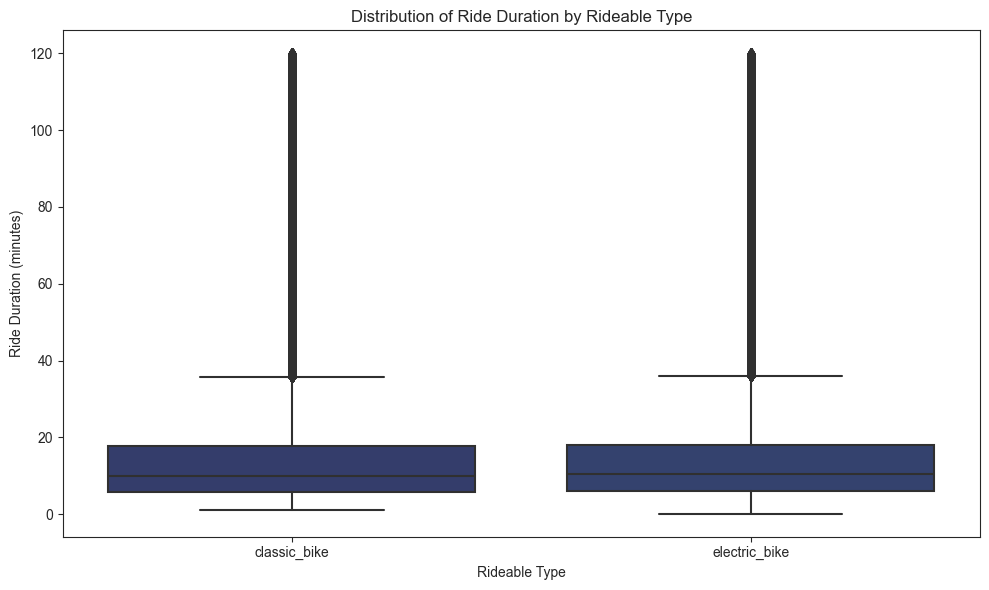

In [33]:
# Create a box plot of ride duration by rideable type
fig, ax = plt.subplots(figsize=(10, 6))

# Filter out outliers (negative durations or extremely long rides)
df_filtered = df[(df['ride_duration'] > 0) & (df['ride_duration'] < 120)]

# Create box plot
sns.boxplot(data=df_filtered, x='rideable_type', y='ride_duration', ax=ax)
ax.set_xlabel('Rideable Type')
ax.set_ylabel('Ride Duration (minutes)')
ax.set_title('Distribution of Ride Duration by Rideable Type')
plt.tight_layout()
plt.show()

The box plot shows the distribution of ride durations for classic and electric bikes.
Both categories have a similar median duration of around ten minutes, suggesting that most trips are short regardless of bike type.
The interquartile range is also similar, meaning user behavior is consistent between the two options.
A few longer trips appear as outliers, but these are relatively rare.
Overall, the plot indicates that bike type has little effect on trip duration within normal usage patterns.

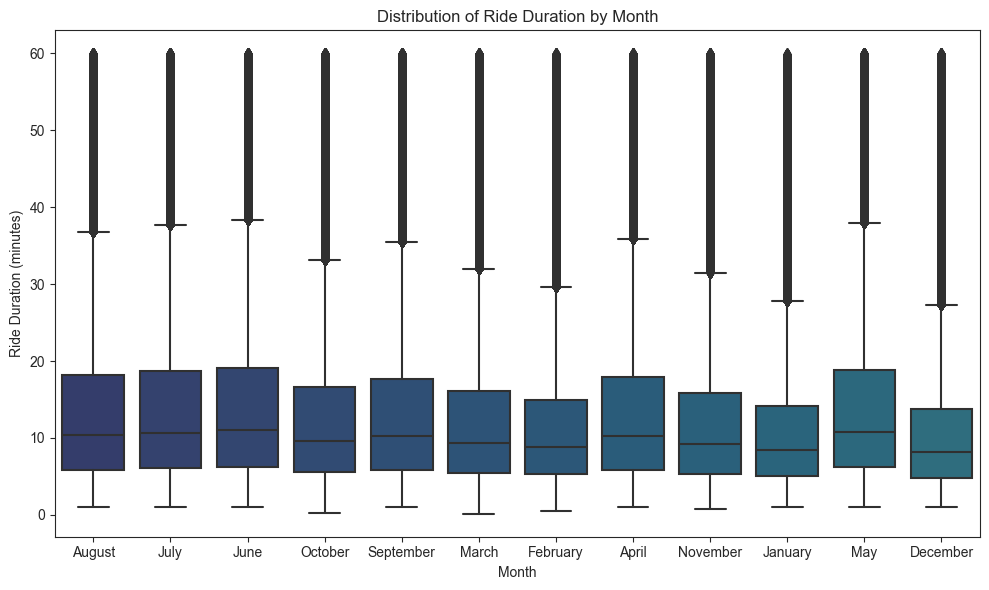

In [34]:
# Create a box plot of ride duration by month
fig, ax = plt.subplots(figsize=(10, 6))

# Filter out outliers (negative durations or extremely long rides)
df_filtered = df[(df['ride_duration'] > 0) & (df['ride_duration'] < 60)]

# Create box plot
sns.boxplot(data=df_filtered, x='month', y='ride_duration', ax=ax)

# Customize labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Ride Duration (minutes)')
ax.set_title('Distribution of Ride Duration by Month')

# Adjust layout and display
plt.tight_layout()
plt.show()

This box plot illustrates the distribution of ride durations across different months in 2022.
Each box shows the interquartile range (IQR) — the middle 50% of rides — while the line inside the box represents the median ride duration. The whiskers indicate the overall spread of the data, and the dots above represent outliers (longer individual rides).

Overall, ride durations remain relatively consistent throughout the year, typically ranging between 5 and 20 minutes. Slightly longer rides are visible during summer months (June–August), which may reflect better weather and increased leisure cycling. In contrast, shorter rides in winter months (December–February) likely result from colder temperatures and fewer casual users.

# FacetGrid plot to show hourly ride patterns between members and casual users. 

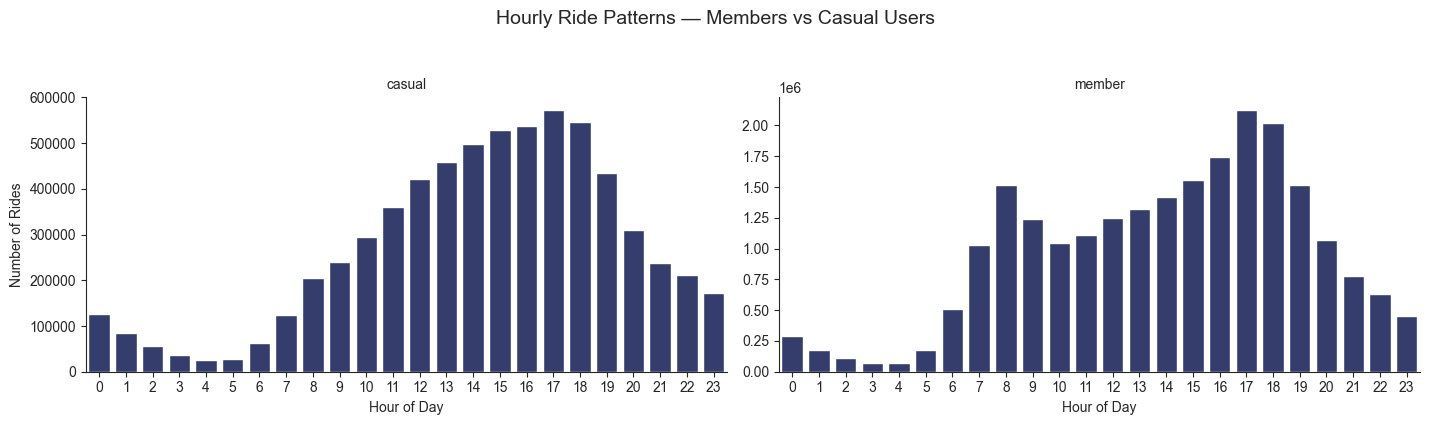

In [48]:
# Aggregate ride counts by hour and user type
hourly_counts = df.groupby(['member_casual', 'hour'])['ride_id'].count().reset_index()

# Create a FacetGrid — make it wider with 'aspect'
g = sns.FacetGrid(hourly_counts, col='member_casual', height=4, aspect=1.8, sharey=False)
g.map_dataframe(sns.barplot, x='hour', y='ride_id')

# Customize titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Hour of Day", "Number of Rides")

plt.suptitle("Hourly Ride Patterns — Members vs Casual Users", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

The FacetGrid visualization allows the data to be split into multiple panels (facets), each representing a subset of the data — in this case, one panel per user type (member vs. casual).
By mapping the same type of plot (a line plot of ride counts by hour) onto each facet, we can directly compare patterns between these two user groups under consistent axes and scales.

The plot reveals that members exhibit two distinct commuting peaks — one around 8 AM and another around 5–6 PM, reflecting daily work travel routines.
Meanwhile, casual users show a single broader peak between late morning and early evening (around 4–5 PM), suggesting that their rides are primarily for leisure or sightseeing during daylight hours.

By using FacetGrid, these behavioral differences become immediately visible without cluttering a single chart, helping to uncover how time-of-day usage varies by customer type and illustrating how Citi Bike serves both commuters and tourists in distinct ways.

# Save file

In [45]:
df['weekday'] = df['weekday'].astype('int8')
df['hour'] = df['hour'].astype('int8')
df['day_type'] = df['day_type'].astype('category')
df['value'] = df['value'].astype('float16')
df['ride_duration'] = df['ride_duration'].astype('float16')

In [47]:
df.to_pickle('df_merged_3.0.pkl')